In [137]:
import os
from PIL import Image
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import keras  
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint,LambdaCallback

In [138]:
lookup = {}
reverselookup = {}
count = 0

# Iterate through gesture directories
for gesture_dir in os.listdir("C:/Users/91937/Downloads/archive/leapGestRecog/00/"):
    lookup[gesture_dir] = count
    reverselookup[count] = gesture_dir
    count += 1

# Print the lookup dictionary
print("Lookup Dictionary:")
print(lookup)

Lookup Dictionary:
{'01_palm': 0, '02_l': 1, '03_fist': 2, '04_fist_moved': 3, '05_thumb': 4, '06_index': 5, '07_ok': 6, '08_palm_moved': 7, '09_c': 8, '10_down': 9}


In [139]:
x_data = []
y_data = []
datacount = 0

for i in range(10):  
    for j in os.listdir('C:/Users/91937/Downloads/archive/leapGestRecog/0' + str(i) + '/'):
        count = 0 
        for k in os.listdir('C:/Users/91937/Downloads/archive/leapGestRecog/0' + str(i) + '/' + j + '/'):
            img = Image.open('C:/Users/91937/Downloads/archive/leapGestRecog/0' + str(i) + '/' + j + '/' + k).convert('L')
            img = img.resize((320, 120))
            arr = np.array(img)
            x_data.append(arr)
            count += 1
        y_values = np.full((count, 1), lookup[j])
        y_data.extend(y_values)
        datacount += count
    
x_data = np.array(x_data, dtype='float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1)

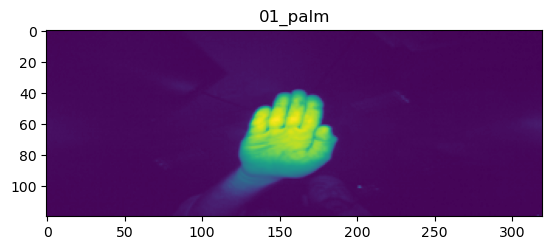

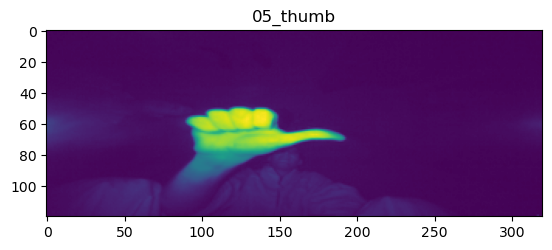

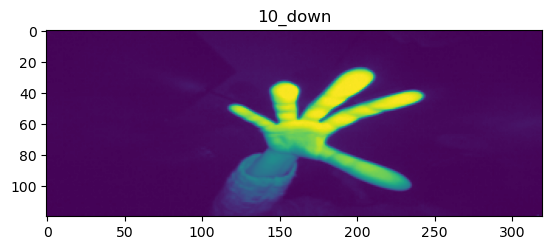

In [140]:
for _ in range(3):
    index = randint(0, len(x_data) - 1)  
    plt.imshow(x_data[index])  
    plt.title(reverselookup[y_data[index, 0]])  
    plt.show()

In [141]:
y_data = to_categorical(y_data)
x_data = x_data.reshape((x_data.shape[0], 120, 320, 1))
x_data /= 255

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=42)

In [143]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (120,320,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10, activation = "softmax"))

In [144]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 120, 320, 32)      832       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 60, 160, 32)       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 60, 160, 64)       18496     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 30, 80, 64)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 30, 80, 96)        55392     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 15, 40, 96)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 15, 40, 96)      

In [145]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [146]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_weights.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [147]:
History = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(x_test, y_test), callbacks=[early_stopping, model_checkpoint])

Epoch 1/10
110/110 [==============================] - ETA: 0s - loss: 0.3635 - accuracy: 0.8855
Epoch 00001: val_accuracy improved from -inf to 0.99650, saving model to best_model_weights.keras
110/110 [==============================] - 341s 3s/step - loss: 0.3635 - accuracy: 0.8855 - val_loss: 0.0118 - val_accuracy: 0.9965
Epoch 2/10
110/110 [==============================] - ETA: 0s - loss: 0.0095 - accuracy: 0.9974
Epoch 00002: val_accuracy improved from 0.99650 to 0.99950, saving model to best_model_weights.keras
110/110 [==============================] - 387s 4s/step - loss: 0.0095 - accuracy: 0.9974 - val_loss: 0.0016 - val_accuracy: 0.9995
Epoch 3/10
110/110 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00003: val_accuracy improved from 0.99950 to 1.00000, saving model to best_model_weights.keras
110/110 [==============================] - 393s 4s/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 1.7605e-04 - val_accuracy: 1.0000
Epoch 4/10
1

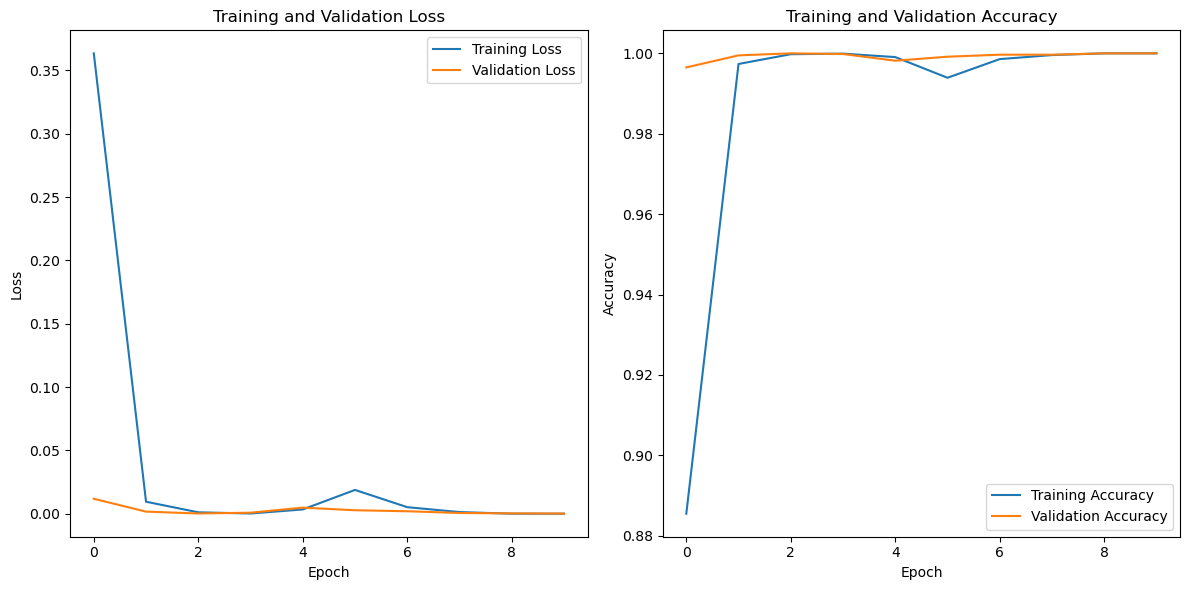

In [148]:
import matplotlib.pyplot as plt


# Plot training history
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(History.history['loss'], label='Training Loss')
plt.plot(History.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(History.history['accuracy'], label='Training Accuracy')
plt.plot(History.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()